##***Mixing problem***

A 1000 gallon holding tank that catches runoff from some chemical process initially has 800 gallons of water with 2 ounces of pollution dissolved in it. Polluted water flows into the tank at a rate of 3 gal/hr and contains 5 ounces/gal of pollution in it. A well mixed solution leaves the tank at 3 gal/hr as well. When the amount of pollution in the holding tank reaches 500 ounces the inflow of polluted water is cut off and fresh water will enter the tank at a decreased rate of 2 gal/hr while the outflow is increased to 4 gal/hr. Determine the amount of pollution in the tank at any time t.

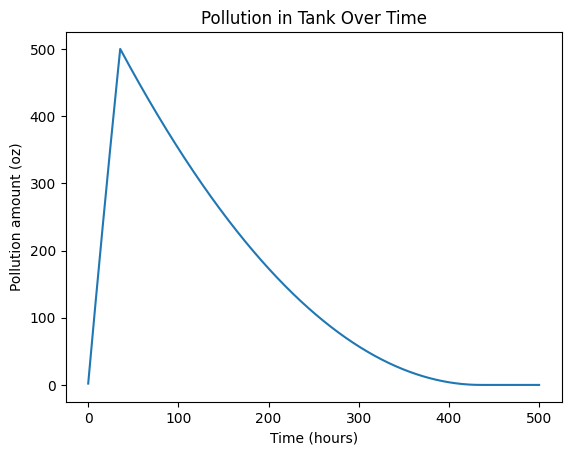

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1
t_max = 500
N = int(t_max / dt)

# Arrays
t = np.zeros(N + 1)
Q = np.zeros(N + 1)

Q[0] = 2


# Time stepping (Euler method)
t1 = None

for i in range(N):
    t[i+1] = t[i] + dt

    # Phase 1
    if t1 is None:
        Q[i+1] = Q[i] + dt * (15 - (3/800) * Q[i])

        if Q[i+1] >= 500:
            t1 = t[i+1]

    # Phase 2
    else:
        V = 800 - 2 * (t[i] - t1)
        if V > 0:
            Q[i+1] = Q[i] + dt * (-4 * Q[i] / V)
        else:
            Q[i+1] = 0

# Plot
plt.plot(t, Q)
plt.xlabel("Time (hours)")
plt.ylabel("Pollution amount (oz)")
plt.title("Pollution in Tank Over Time")
plt.show()
